## Penerapan 8 Tahapan Deep Learning pada Sistem Deteksi Bahasa Isyarat Menggunakan YOLOv8 dan Dataset Roboflow

In [ ]:
!pip install ultralytics roboflow opencv-python matplotlib --quiet

from roboflow import Roboflow
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 35.9 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# ============================================
# TAHAPAN 1 — DATA ACQUISITION (Akuisisi Data)
# ============================================
# Mengambil dataset dari Roboflow (ganti dengan key Anda)

rf = Roboflow(api_key="h7rhkBvQzmKC1NNWO6Y1")
project = rf.workspace("david-lee-d0rhs").project("american-sign-language-letters")
version = project.version(1)
dataset = version.download("yolov8")  # Dataset otomatis dibuat folder /datasets/

print("Dataset berada di folder:", dataset.location)

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to American-Sign-Language-Letters-1 in yolov8:: 100%|██████████| 3468/3468 [00:00<00:00, 4614.86it/s]

Dataset berada di folder: /content/American-Sign-Language-Letters-1


In [ ]:
# ============================================
# TAHAPAN 2 — DATA PREPROCESSING (Preprocessing)
# ============================================
# Proses dilakukan otomatis oleh Ultralytics:
# - Resize image ke 640x640
# - Normalisasi pixel 0-1
# - Augmentasi (flip, rotate, hsv shift, mosaic, dsb)
# Tidak perlu coding manual, tetapi kita tetap bisa cek dataset:
import os

dataset_path = dataset.location  # path dataset otomatis
train_path = dataset_path + "/train/images"

print("Dataset berada di:", dataset_path)
print("Jumlah data train:", len(os.listdir(train_path)))

Dataset berada di: /content/American-Sign-Language-Letters-1
Jumlah data train: 1512


In [ ]:
# ============================================
# TAHAPAN 3 — SPLIT DATA (Training / Validation / Testing)
# ============================================
# Roboflow otomatis menyediakan split dataset:
# - train/
# - valid/
# - test/
# Kita tampilkan struktur folder:
import os

dataset_path = dataset.location

for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, "").count(os.sep)
    indent = " " * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = " " * 4 * (level + 1)
    for f in files:
        print(f"{subindent}{f}")

American-Sign-Language-Letters-1/
    README.roboflow.txt
    README.dataset.txt
    data.yaml
    test/
        images/
            W7_jpg.rf.c80a52e6a95797bd8cf3a03ec4701d99.jpg
            J9_jpg.rf.213a9e356777a13d336e4988c33a93e1.jpg
            A22_jpg.rf.f02ad8558ce1c88213b4f83c0bc66bc8.jpg
            C19_jpg.rf.577ce02a223c65e89dc4a4eacd130040.jpg
            O20_jpg.rf.517237686eca6346d6d72cbd96b79cb3.jpg
            Q10_jpg.rf.87a66659eb5791bf51f56ff1e1883273.jpg
            H19_jpg.rf.4957c34731ee5c867288825f5ca9f170.jpg
            U5_jpg.rf.2be92300b664a1946dde8902dc50adbb.jpg
            W23_jpg.rf.caecf7140a005d779f0950cc7c6a7616.jpg
            F3_jpg.rf.c854e14a7108c9294c226a392026e73b.jpg
            Z18_jpg.rf.2cffbd9beaeb50a7d03751c3ce738e81.jpg
            D1_jpg.rf.89a5f6f41bf8bc795db94105f709dd34.jpg
            X20_jpg.rf.2a36699005b7e1881e5faa278c506b86.jpg
            S0_jpg.rf.4466ad3687a4cfac9f6e4474d89e121e.jpg
            Z9_jpg.rf.fd5bb2f80d391b73a85bbbd

In [ ]:
# =============================================================
# TAHAPAN 4 — PREPROCESSING (Data Preparation)
# =============================================================
# YOLOv8 otomatis membaca struktur folder Roboflow.
# Namun kita tetap cek jumlah file:

train_images = len(os.listdir(f"{dataset.location}/train/images"))
valid_images = len(os.listdir(f"{dataset.location}/valid/images"))
test_images  = len(os.listdir(f"{dataset.location}/test/images"))

print("Total Train Images :", train_images)
print("Total Valid Images :", valid_images)
print("Total Test Images  :", test_images)


Total Train Images : 1512
Total Valid Images : 144
Total Test Images  : 72


In [ ]:
# =============================================================
# TAHAPAN 5 — MEMBANGUN MODEL YOLOv8 (Modeling)
# =============================================================
model = YOLO("yolov8n.pt")      # kamu bisa ganti: yolov8s.pt, yolov8m.pt, dll
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [ ]:
# =============================================================
# TAHAPAN 6 — TRAINING MODEL (Model Training)
# =============================================================
results = model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    name="sign_language_model"
)

Ultralytics 8.3.239 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/American-Sign-Language-Letters-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=sign_language_model, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100

In [ ]:
# =============================================================
# TAHAPAN 7 — EVALUASI MODEL (Model Evaluation)
# =============================================================
metrics = model.val()
print(metrics)

Ultralytics 8.3.239 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,010,718 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 631.6±257.5 MB/s, size: 13.2 KB)
val: Scanning /content/American-Sign-Language-Letters-1/valid/labels.cache... 144 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 144/144 107.5Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.4it/s 2.6s
                   all        144        144      0.924      0.851      0.951      0.801
                     A          5          5      0.776        0.8       0.92      0.796
                     B          9          9          1       0.87      0.995      0.872
                     C          3          3      0.957          1      0.995      0.852
                     D          6          6      0.817      0.833      0.942       0.83
                     E    

In [ ]:
# =============================================================
# TAHAPAN 8 — INFERENSI / PREDIKSI (Deployment)
# =============================================================
test_img = "/content/American-Sign-Language-Letters-1/test/images/A22_jpg.rf.f02ad8558ce1c88213b4f83c0bc66bc8.jpg"   # ganti bila perlu

pred = model.predict(test_img, save=True)
pred



image 1/1 /content/American-Sign-Language-Letters-1/test/images/A22_jpg.rf.f02ad8558ce1c88213b4f83c0bc66bc8.jpg: 640x640 1 A, 7.3ms
Speed: 3.1ms preprocess, 7.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}
 obb: None
 orig_img: array([[[252, 255, 251],
         [252, 255, 251],
         [252, 255, 251],
         ...,
         [ 19,  33,  52],
         [ 13,  27,  46],
         [  9,  23,  42]],
 
        [[252, 255, 251],
         [252, 255, 251],
         [252, 255, 251],
         ...,
         [ 18,  32,  51],
         [ 14,  28,  47],
         [ 12,  26,  45]],
 
        [[254, 255, 253],
         [254, 255, 253],
         [254, 255, 253],
         ...,
         [ 23,  35,  53],
         [ 21,  33,  51],
         [ 20,  32,  50]],
 
        ...,
 
        [[ 15,  79, 134],
         [ 17,  81, 136],
         [ 18,  82, 

In [ ]:
folder_path = "/content/American-Sign-Language-Letters-1/test/images"
output_folder = "/content/drive/MyDrive/output_inference/"

# Buat folder output jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Loop semua file dalam folder
for filename in os.listdir(folder_path):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):
        img_path = os.path.join(folder_path, filename)

        # Inference
        results = model(img_path)

        # Simpan hasil anotasi otomatis YOLO
        for r in results:
            annotated_img = r.plot()
            cv2.imwrite(os.path.join(output_folder, filename), annotated_img)

print("✔️ Inferensi selesai! Hasil tersimpan di:", output_folder)



image 1/1 /content/American-Sign-Language-Letters-1/test/images/W7_jpg.rf.c80a52e6a95797bd8cf3a03ec4701d99.jpg: 640x640 1 W, 7.4ms
Speed: 3.0ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/American-Sign-Language-Letters-1/test/images/J9_jpg.rf.213a9e356777a13d336e4988c33a93e1.jpg: 640x640 1 J, 7.3ms
Speed: 2.1ms preprocess, 7.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/American-Sign-Language-Letters-1/test/images/A22_jpg.rf.f02ad8558ce1c88213b4f83c0bc66bc8.jpg: 640x640 1 A, 7.3ms
Speed: 2.1ms preprocess, 7.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/American-Sign-Language-Letters-1/test/images/C19_jpg.rf.577ce02a223c65e89dc4a4eacd130040.jpg: 640x640 1 C, 7.3ms
Speed: 2.2ms preprocess, 7.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/American-Sign-Language-Letters-1/test/images/O20_jpg.rf.517237686e

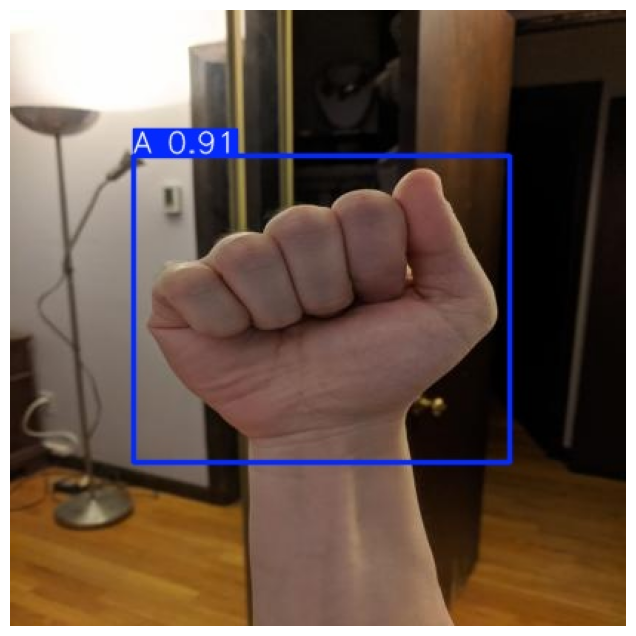

Menampilkan gambar: /content/runs/detect/predict/A22_jpg.rf.f02ad8558ce1c88213b4f83c0bc66bc8.jpg


In [ ]:
import glob
import cv2
import matplotlib.pyplot as plt

# Ambil semua file gambar dalam folder prediksi
pred_images = glob.glob("/content/runs/detect/predict/A22_jpg.rf.f02ad8558ce1c88213b4f83c0bc66bc8.jpg")

# Ambil file hasil prediksi terakhir
latest = pred_images[-1]

# Baca dan tampilkan
img = cv2.imread(latest)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,8))
plt.imshow(img_rgb)
plt.axis("off")
plt.show()

print("Menampilkan gambar:", latest)